# Лабораторная работа 7. Библиотеки. Научный Python 1.
# Линейные и нелинейные уравнения.

Загрузим необходимые для работы библиотеки: 

In [ ]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.optimize import root # описание библиотеки: https://docs.scipy.org/doc/scipy/reference/optimize.html
from scipy.optimize import minimize, rosen, rosen_der
import math
import time
import pylab
from sympy import pi, symbols, expand, collect, factor, cancel, together, simplify, apart, together, degree, limit, oo, diff
sm.init_printing()
%matplotlib notebook

# 1. Линейная алгебра

Массивы бывают 1-мерные (вектора) 2-мерные (матрицы) и многомерные.

Все элементы массива должны принадлежать к одному типу данных.

Создадим одномерный массив из списка при помощи функции array:

In [ ]:
np.array([1, 2, 3])

array([1, 2, 3])

Создадим двумерный массив из списка при помощи функции array. Обратите внимание на скобки.

In [ ]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Для создания специфических массивов надо использовать специальные методы. Нарпимер, zeros создаёт массив нулей.

In [ ]:
np.zeros((3,4), order='F')

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
np.zeros((2,), dtype=[('x', 'i4'), ('y', 'i4')])

array([(0, 0), (0, 0)], dtype=[('x', '<i4'), ('y', '<i4')])

In [ ]:
np.zeros((2,3))# AAAAAAAAA

array([[0., 0., 0.],
       [0., 0., 0.]])

Для создания единично матрицы используется функция eye.

In [ ]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
np.eye(3, k= -1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
np.empty([2, 3], dtype=int)

array([[0, 0, 0],
       [0, 0, 0]])

Для получения случайных чисел из нормального распределения используем функцию randn() из модуля random. Для создания матрицы случайных чисел надо передать функции два числа задающих диапазон случайных значений [10, 100] и размерность матрицы (3, 3)

In [ ]:
arr = np.random.uniform(10, 100, (3, 5))
arr

array([[26.69060984, 75.4796169 , 66.89547996, 71.23195447, 61.88051375],
       [74.82338548, 71.5507749 , 36.53006737, 95.96729012, 48.8907896 ],
       [10.73389799, 57.01819786, 97.96649851, 19.60635624, 22.15710413]])

К эллементам массива можно обращаться по индексу 

In [ ]:
arr[0,1:5:2]  #  arr[номер строки , от столбца : до столбца : шаг]

array([84.87373669, 20.58067339])

Чтобы вывести все элементы строки или столбца можно написать [:]

In [ ]:
arr[:,1:5:2]+1

array([[85.87373669, 21.58067339],
       [22.38676505, 71.95093226],
       [38.76683689, 94.26897067]])

К массиву можно применять арифметические и логические операции (при этом эта операция будет применина к каждому эллементу):

In [ ]:
arr < 50

array([[ True, False, False,  True, False],
       [False,  True, False, False, False],
       [ True,  True,  True, False,  True]])

# Основные операции над матрицами и решение СЛАУ

In [ ]:
# определение матрицы
A = np.array([[1, 2], [3, 4]])
x0 = [5.6, 6.1]
b = np.dot(A,x0)


# вычисление определителя матрицы
detA = linalg.det(A)

# вычисление ранга матрицы
rankA = np.linalg.matrix_rank(A)

# вычисление обратной матрицы
B = linalg.inv(A)

# вычисление суммы матриц
C = A + B

# вычисление произведения матриц
D = np.dot(A,B)

# решение СЛАУ A*x=b с помощью обратной матрицы 
x = np.dot(linalg.inv(A),b) 
print('x = \n', x)

# проверка решения
errx = np.dot(A,x) - b

x = 
 [5.6 6.1]


# Упражнение 1. Норма в норме.

Напишите программу для вычисления норм вещественных матриц:

$$ \|A\|_1 = \underset{1 \leq j \leq n}{max}\overset{n}{\underset{i=1}{\sum}}|a_{ij}|, \quad
\|A\|_E = \left( \overset{n}{\underset{i,j=1}{\sum}}|a_{ij}|^2 \right)^{1/2}, \quad
\|A\|_\infty = \underset{1 \leq i \leq n}{max}\overset{n}{\underset{j=1}{\sum}}|a_{ij}|. $$

На основе экспериментов со случайными матрицами при различных $n$ убедитесь в выполнении неравенств 


$$ \frac{1}{\sqrt{n}} \|A\|_\alpha \leq \|A\|_E \leq \sqrt{n}\|A\|_\alpha, \quad \alpha = 1, \infty.$$

In [ ]:
from numpy import linalg as LA

LA.norm(arr, 1),LA.norm(arr, 'fro'),LA.norm(arr, np.inf) #https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

# 2. Символьные вычисления и исследование функций.

In [ ]:
from sympy import pi, symbols, expand, collect, factor, cancel, together, simplify, apart, together, degree, limit, oo, diff

# 2.1. Число $\pi$

In [ ]:
# Выыедем заданное колличество знаков числа pi
npi=70;
print('\n Выведем %i знаков числа пи:' %npi ,pi.n(npi));


 Выведем 70 знаков числа пи: 3.141592653589793238462643383279502884197169399375105820974944592307816


# 2.2. Многочлены и рациональные функции

In [ ]:
# Создадим несколько символьных переменных
x,y,z,a,b=symbols('x y z a b')

Проверим фомулу бинома Ньютона, пусть $x=(a+b)^n$

SymPy умеет раскрывать скобки, для этого используется функция expand

In [ ]:
n=6
x=(a+b)**n
y=expand(x)
print(x, '=', y)
y

(a + b)**6 = a**6 + 6*a**5*b + 15*a**4*b**2 + 20*a**3*b**3 + 15*a**2*b**4 + 6*a*b**5 + b**6


In [ ]:
# определим степень многочлена  по b
print ('Полином имеет порядок %i по переменной b' %(degree(y,b)))
# и сгрупируем члены со степенями  b
print('Члены с этой переменной имеют вид:')
collect(y,b),  collect(y,a)

Полином имеет порядок 6 по переменной b
Члены с этой переменной имеют вид:


In [ ]:
# раскрытое вырожение можно свернуть обратно
z=factor(y)
z

SymPy умеет сокращать символьное отношение, для этого используется функция cancel

(a**3 - b**3)/(a**2 - b**2) = (a**2 + a*b + b**2)/(a + b)


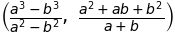

In [ ]:
x,y,z,a,b=symbols('x y z a b')
x=(a**3-b**3)/(a**2-b**2)
print(x,'=',cancel(x))
x, cancel(x)

Можно приводить дроби к общему знаменателю, для этого используется функция together

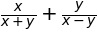

In [ ]:
x,y,z,a,b=symbols('x y z a b')
a=y/(x-y)+x/(x+y)
a

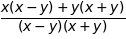

In [ ]:
together(a)

Можно попытаться переписать выражение в наиболее простом виде, для этого используется функция simplify

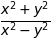

In [ ]:
simplify(a)

Разложить на элементарные дроби по отношению к x 

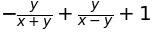

In [ ]:
b=apart(a,x)
b

т.к.

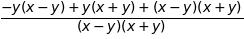

In [ ]:
together(b)

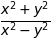

In [ ]:
cancel(together(b))

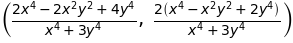

In [ ]:
x=(a**3+a+2)/(a**3 + 1)
expand(x) 
apart(x,a), together(apart(x,a))



# 2.3 Решение алгебраических уравнений

In [ ]:
a,b,c,d,e,f,x = symbols('a b c d e f x')

Как известно, алгеброические уравнения до 4 степени включительно имеют решение в радикалах:

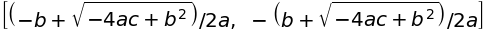

In [ ]:
sm.solve(a*x**2+b*x+c,x)

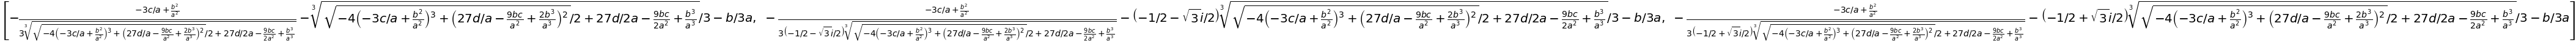

In [ ]:
sm.solve(a*x**3+b*x**2+c*x+d,x)

Функция roots возвращает численное значение корней многочлена с их множественностями.

In [ ]:
sol = sm.roots(x**3-3*x+2,x)
sol

In [ ]:
# обратите внимание на тип:
type(sol)

dict

# 2.4. Пределы

Пусть задана числовая последовательность
$$x_{n}=\frac{5n^2+2n}{7n^2-3n}$$

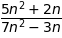

In [ ]:
n=symbols('n')
xn = (5*n**2+2*n)/(7*n**2-3*n)
xn

Рассмотрим разность двух членов последовательности $x_{n+1}-x_{n}$

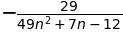

In [ ]:
xnn=simplify(xn.subs({n:n+1})-xn)
xnn

или, что то же самое

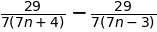

In [ ]:
xnn=apart(xnn,n)
xnn

In [ ]:
print('Последовательность '+'не '*int(bool(xnn.subs({n:1}) > 0)) +'является убывающей')

Последовательность является убывающей


Вычислим предел последовательности

In [ ]:
LimXn = limit(xn,n,oo);
print('\n Предел последовательности xn равен:', LimXn);


 Предел последовательности xn равен: 5/7


# Пример. Вычисление предела с помощью критерия Коши

Критерий Коши: последовательность сходится если для любого $\epsilon$ существует такое N, что для двух любых номеров $m,n>N$ верно $|x_{n}-x_{m}|<\epsilon$.

In [ ]:
def Cauchy_convergence(xn, eps):
    for j in range(100,1000): 
        xn1=xn.subs({n:j-1}).n()
        xn2=xn.subs({n:j}).n()
        if (abs(xn2-xn1)<eps): 
            break
    return abs(xn2-xn1), j

In [ ]:
# зададимся величиной эпсилон
eps = 1.e-6

XnXn, N = Cauchy_convergence(xn, eps)
        
LimXnNum = xn.subs({n:N}).n()
LimXnNum, XnXn, N

In [ ]:
print('Предел числовой последовательности xn (аналитически) равен:', float(LimXn));
print('Предел числовой последовательности xn (по кр. Коши при eps =%12.5e, N=%i) равен:' %(eps, N), LimXnNum);
print('Разность этих значений равна:', abs(float(LimXn)-LimXnNum));

Предел числовой последовательности xn (аналитически) равен: 0.7142857142857143
Предел числовой последовательности xn (по кр. Коши при eps = 1.00000e-06, N=771) равен: 0.715053763440860
Разность этих значений равна: 0.000768049155145945


# 2.5. Произвадная

Рассмотрим функцию $y = x^2$, и приращение аргумента $dx$, приводящее к приращению функции $dy$:

In [ ]:
x,y,dx,dy=symbols('x y dx dy')
y=x**2
dy=y.subs({x:x+dx})-y.subs({x:x})
print('y =', y,',  dy =', dy)
y, dy

y = x**2 ,  dy = -x**2 + (dx + x)**2


Найдём предел отношения $dy/dx$ при $dx$ стремящемся к 0:

In [ ]:
dydx = limit(dy/dx,dx,0)
print('dydx =', dydx)
dydx

dydx = 2*x


Определение. Такой предел называют производной функции $y(x)$ по $x$.

# Упражнение 2. Производные как предел

Найдите с помощью предела производные следующих функций:

$$ y = sin(x), \quad y=ln(x), \quad y=6sin(3x)-tan(x^2)+e^{6x} $$

In [ ]:

sm.cos(pi/4),sm.tan(5*pi/6)

In [ ]:

x,y,dx,dy=symbols('x y dx dy')
#y = math.sin(x)
#y = np.sin(np.pi/2.)
#y = np.sin(x)
y = 6*sm.sin(3*x) - sm.tan(x**2) + e**(6*x)
dy=y.subs({x:x+dx})-y.subs({x:x})

y, dy

In [ ]:
dydx = limit(dy/dx,dx,0)

dydx

В пакете символьных вычислений можно находить производную напрямую:

In [ ]:
x,y=symbols('x y')

f=x*sm.sin(x+y);

# Вычислим частные производные функции:
fx=diff(f,x);
fy=diff(f,y);
print('\n Производные функции f(x,y) по x:', fx);
print('\n Производные функции f(x,y) по y:', fy);

# Вторая производная по x и первая по y
fxxy=diff(a,x,2,y);
print('\n Производные функции f(x,y) по xx и y:', fxxy);


 Производные функции f(x,y) по x: x*cos(x + y) + sin(x + y)

 Производные функции f(x,y) по y: x*cos(x + y)

 Производные функции f(x,y) по xx и y: 0


# Упражнение 3. Производные

Проверьте правильность найденных ранее с помощью предела производных.

In [ ]:
x,y=symbols('x y')

f = 6*sm.sin(3*x) - sm.tan(x**2) + e**(6*x);

# Вычислим частные производные функции:
fx=diff(f,x);
#fy=diff(f,y);
print('\n Производные функции f(x,y) по x:', fx);
f, fx


 Производные функции f(x,y) по x: 6*e**(6*x)*log(e) - 2*x*(tan(x**2)**2 + 1) + 18*cos(3*x)


# 3. Нелинейные уравнения и системы.

# 3.1. Алгоритмы для решения нелинейного уравнения 

Нас интересуют задачи вида: $f(x) = 0$.

Пусть есть некоторая функция $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$.

In [ ]:
def f(x):
    return ((1.0 + x + x**2) * math.exp(-x) + math.sin(x+0.1) - 1.0)

Построим график этой функции

In [ ]:
A = -1.0
B =  10.0
N =  200
Y = np.zeros((N))
X = np.linspace(A, B, N)
for i in range(N): 
    Y[i] = f(X[i])

plt.figure(figsize=(8,5))      
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
np.linspace(A, B, N)

<IPython.core.display.Javascript object>

array([-1.00000000e+00, -9.44723618e-01, -8.89447236e-01, -8.34170854e-01,
       -7.78894472e-01, -7.23618090e-01, -6.68341709e-01, -6.13065327e-01,
       -5.57788945e-01, -5.02512563e-01, -4.47236181e-01, -3.91959799e-01,
       -3.36683417e-01, -2.81407035e-01, -2.26130653e-01, -1.70854271e-01,
       -1.15577889e-01, -6.03015075e-02, -5.02512563e-03,  5.02512563e-02,
        1.05527638e-01,  1.60804020e-01,  2.16080402e-01,  2.71356784e-01,
        3.26633166e-01,  3.81909548e-01,  4.37185930e-01,  4.92462312e-01,
        5.47738693e-01,  6.03015075e-01,  6.58291457e-01,  7.13567839e-01,
        7.68844221e-01,  8.24120603e-01,  8.79396985e-01,  9.34673367e-01,
        9.89949749e-01,  1.04522613e+00,  1.10050251e+00,  1.15577889e+00,
        1.21105528e+00,  1.26633166e+00,  1.32160804e+00,  1.37688442e+00,
        1.43216080e+00,  1.48743719e+00,  1.54271357e+00,  1.59798995e+00,
        1.65326633e+00,  1.70854271e+00,  1.76381910e+00,  1.81909548e+00,
        1.87437186e+00,  

Очевидно, что корень может находиться толькро между точками a и b, для которых справедливо: $f(a)>0, f(b)<0$ или $f(a)>0, f(b)<0$, т.е. $f(a)\cdot f(b)<0$. Найдём такие точки a и b переберая значения x в некотором интервале

In [ ]:
n=20
AB = np.zeros((2,n))
xab = np.linspace(A, B, n)
ia=0
for i in range(n-1):
    if f(xab[i])*f(xab[i+1])<0:
        AB[0][ia]=xab[i]
        AB[1][ia]=xab[i+1]
        print ('\t %i \t %.10e \t %.10e' %(ia, AB[0][ia], AB[1][ia]))
        ia=ia+1
print('Найдено %i интервалов локализации корня.' %(ia))

	 0 	 -1.0000000000e+00 	 -4.2105263158e-01
	 1 	 -4.2105263158e-01 	 1.5789473684e-01
	 2 	 2.4736842105e+00 	 3.0526315789e+00
	 3 	 7.1052631579e+00 	 7.6842105263e+00
	 4 	 7.6842105263e+00 	 8.2631578947e+00
Найдено 5 интервалов локализации корня.


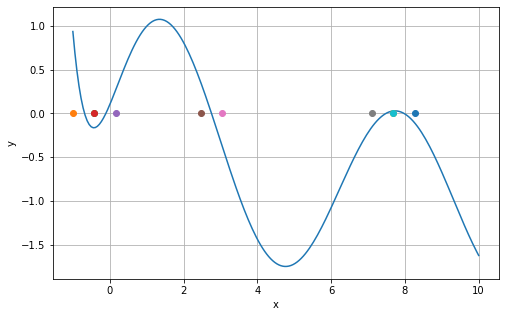

In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 3.2 Метод деления отрезка пополам (Метод бисекции)

In [ ]:
def bisection(f, x1, x2, pr=0, tol=1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка мнтервала
    :param x2: - правая точка мнтервала
    :param pr: - параметр выдачи итераций (pr=0 - не выводить итерации, pr=1 - выводить итерации)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0.:
        print('f(x1) and f(x2) can not have the same signs')
    n = int(math.ceil(np.log(abs(x2-x1)/tol)/np.log(2.)))
    
    Error=abs(x1-x2)
    for i in range(n):
        Error0=Error
        x3 = 0.5*(x1+x2)
        f3 = f(x3)
        if f2*f3 < 0.:
            x1=x3
            f1=f3
        else:
            x2=x3
            f2=f3
        Error=abs(x1-x2)
        k=np.log(Error)/np.log(Error0)
        if pr>0:
            print('итерация:\t%i \t%.6e \t%.3f' %(i, Error, k))
    return (x1+x2)/2

In [ ]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisection(f, AB[0][i], AB[1][i], pr=0)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -6.8256428205e-01 	 f(root[0]) =   4.0557335268e-11
	 1 	 root[1] =  -1.0653060478e-01 	 f(root[1]) =  -1.6943224601e-11
	 2 	 root[2] =   2.7584180781e+00 	 f(root[2]) =  -3.5366154449e-11
	 3 	 root[3] =   7.4839086268e+00 	 f(root[3]) =   2.9021229864e-13
	 4 	 root[4] =   7.9776600799e+00 	 f(root[4]) =  -1.9744206270e-12


In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

# 3.3 Метод Ньютона

Вычислим производную заданной функции

In [ ]:
x=symbols('x')

F = (1.0 + x + x**2) * sm.exp(-x) + sm.sin(x + 0.1) - 1.0;

FX = diff(F,x)
FX

In [ ]:
def fx(a):
    return FX.subs({x:a}).n()

In [ ]:
def newton(f, x, pr=0, tol=1.0e-10):   
    Error=2
    i=0
    while Error>tol:
        Error0=Error
        x0=x
        x = x0 - f(x0)/fx(x0)
        Error=math.fabs(x-x0)
        k=np.log(Error)/np.log(Error0)
        i=i+1
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x

Рассмотрим в качестве начального приближения левые точки отрезков локализации:

In [ ]:
xRootA = np.zeros((2,ia))

for i in range(ia): 
    xRootA[0][i] = newton(f, AB[0][i], pr=0)
    xRootA[1][i] = f(xRootA[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRootA[0][i], i, xRootA[1][i]))   

	 0 	 root(0) =  -6.8256428202e-01 	 f(root[0]) =  -3.3306690739e-16
	 1 	 root(1) =   2.7584180781e+00 	 f(root[1]) =   0.0000000000e+00
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   7.4839086268e+00 	 f(root[3]) =   2.2204460493e-16
	 4 	 root(4) =   7.4839086268e+00 	 f(root[4]) =  -1.1102230246e-16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootA[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

Рассмотрим в качестве начального приближения правые точки отрезков локализации:

In [ ]:
xRootB = np.zeros((2,ia))

for i in range(ia): 
    xRootB[0][i] = newton(f, AB[1][i], pr=0)
    xRootB[1][i] = f(xRootB[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRootB[0][i], i, xRootB[1][i])) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


	 0 	 root(0) =   2.7584180781e+00 	 f(root[0]) =   0.0000000000e+00
	 1 	 root(1) =  -1.0653060476e-01 	 f(root[1]) =  -1.1102230246e-16
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   7.4839086268e+00 	 f(root[3]) =  -1.1102230246e-16
	 4 	 root(4) =   7.9776600799e+00 	 f(root[4]) =   2.2204460493e-16


In [ ]:
plt.figure(figsize=(10,7))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootB[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

Видно, что решение из крайних точек отрезков локализации корня сходится к разным решениям. Это обусловленно локальными свойствами функции - поведением производной. 

# Решение системы нелинейных уравнений

# 3.4. Методом Ньютона 

Нас интересуют задачи вида:
\begin{cases}
   f(x_1,x_2) = 0
   \\
   g(x_1,x_2) = 0
\end{cases}

Рассмотрим систему:
\begin{cases}
   4(x_2-1)^2+(x_1-1)^2-1 = 0
   \\
   x_2 - x_1 sin(25x_1) = 0
\end{cases}

Построим график этой функции

In [ ]:
def f1(x1, x2):
    return (4.0*(x2 - 1.0)**2 + (x1 - 1.0)**2 - 1.0)

def f2(x1, x2):
    return (x2 - x1*math.sin(25.0*x1))

def X22(x1):
    return x1*math.sin(25.0*x1)

def X21p(x1):
    return (math.sqrt((1.0 - (x1 - 1.0)**2)/4.0)+1.0)

def X21m(x1):
    return (-math.sqrt((1.0 - (x1 - 1.0)**2)/4.0)+1.0)

In [ ]:
A = 0.0
B = 2.0
N = 500
y21p = np.zeros((N))
y21m = np.zeros((N))
y22 = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    y21p[i] = X21p(x[i])
    y21m[i] = X21m(x[i])
    y22[i]  =  X22(x[i])
    
plt.figure(figsize=(10,5))  
plt.plot(x, y21p, x, y21m, x, y22)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

Вычислим производные этих функций и сформируем матрицу Якоби:

In [ ]:
x1, x2 = symbols('x1, x2')

F1 = 4.0*(x2 - 1.0)**2 + (x1 - 1.0)**2 - 1.0;

F2 = x2 - x1*sm.sin(25.0*x1)

Найдём частные производные: 
$$\frac{\partial f_1(x_1,x_2)}{\partial x_1}, \frac{\partial f_1(x_1,x_2)}{\partial x_2}, \frac{\partial f_2(x_1,x_2)}{\partial x_1}, \frac{\partial f_2(x_1,x_2)}{\partial x_2}$$

In [ ]:
F1X1 = diff(F1,x1)
F1X1

In [ ]:
F1X2 = diff(F1,x2)
F1X2

In [ ]:
F2X1 = diff(F2,x1)
F2X1

In [ ]:
F2X2 = diff(F2,x2)
F2X2

Сформируем иэ них матрицу Якоби:
$$J = 
\begin{pmatrix}
  \frac{\partial f_1(x_1,x_2)}{\partial x_1} \frac{\partial f_1(x_1,x_2)}{\partial x_2}\\
  \frac{\partial f_2(x_1,x_2)}{\partial x_1} \frac{\partial f_2(x_1,x_2)}{\partial x_2}
\end{pmatrix}
$$

In [ ]:
J=sm.Matrix([[F1X1,F1X2],[F2X1,F2X2]])
J

⎡             2⋅x₁ - 2.0               8.0⋅x₂ - 8.0⎤
⎢                                                  ⎥
⎣-25.0⋅x₁⋅cos(25.0⋅x₁) - sin(25.0⋅x₁)       1      ⎦

Программа для решения систем нелинейных уравнений методом Ньютона:

In [ ]:
def NEWTON(n, fun, Jac, x0, pr=0, tol=1.0e-10): 
    x = np.zeros(n)
    b = np.zeros(n)
    A = np.zeros((n,n)) 
    dx = np.zeros(n)
    xStep = np.zeros((1000,n))
    Error=2
    i=0
    x[:]=x0[:]
    xStep[i][:]=x[:]
    while Error>tol and i<999:
        Error0=Error 
#        x0[:]=x[:]
        b=-fun(x)
        A=Jac(x)
        dx = np.dot(linalg.pinv(A),b)
        x[:]=x[:]+dx[:]
        Error=math.sqrt(np.dot(dx.T,dx))
        k=np.log(Error)/np.log(Error0)
        i=i+1
        xStep[i][:]=x[:]
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x, xStep, i

Программы для вычсления значения функций и Якобиана:

In [ ]:
def fun(x):
    f = np.zeros(2)
    f[0] = f1(x[0],x[1])
    f[1] = f2(x[0],x[1])
    return f 

def jac(x):
    JJ = J.subs({x1:x[0],x2:x[1]}).n()
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

Выберем начальное приближение:

In [ ]:
x10=1.8
x20=1.1

# попробуйте:
# x10=1.0
# x20=1.0

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(x10, x20, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

Значение Якобиана в начальное точке

In [ ]:
jac([x10, x20])

array([[  1.6       ,   0.8       ],
       [-24.49039302,   1.        ]])

In [ ]:
X0 = np.array([x10, x20])
sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr=1, tol=1.0e-10)

print(' x1 = %12.6e \t x2 = %12.6e \t f1(x1,x2) = %12.6e \t f1(x1,x2) = %12.6e' 
      %(sol[0],sol[1], f1(sol[0],sol[1]), f2(sol[0],sol[1]))) 

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(sol[0], sol[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

итерация:	1 	4.023895e-01 	 
итерация:	2 	1.588120e-01 	  2.0212721369631175
итерация:	3 	3.628891e-02 	  1.8022726495201313
итерация:	4 	2.102438e-03 	  1.8589280899170557
итерация:	5 	7.120488e-06 	  1.9226589841743564
итерация:	6 	8.159902e-11 	  1.959851229426387
 x1 = 1.791933e+00 	 x2 = 1.305304e+00 	 f1(x1,x2) = 0.000000e+00 	 f1(x1,x2) = 4.662937e-15


<IPython.core.display.Javascript object>

In [ ]:
r = sol[:] - X0[:]
R = 1.1*math.sqrt(np.dot(r.T,r))

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(xStep[0:iStep+1,0], xStep[0:iStep+1,1], '-o')
plt.xlim(sol[0]-R, sol[0]+R)
plt.ylim(sol[1]-R, sol[1]+R)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

# 3.5 Функция root 

In [ ]:
SOL = root(fun, X0, jac=jac, method='hybr')

print(SOL)

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(SOL.x[0], SOL.x[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

    fjac: array([[-0.05025335,  0.9987365 ],
       [-0.9987365 , -0.05025335]])
     fun: array([4.44089210e-16, 3.21964677e-14])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-9.79928722e-11,  5.98241088e-12])
       r: array([-31.50774661,   0.80310234,  -2.48516491])
  status: 1
 success: True
       x: array([1.79193318, 1.30530388])


<IPython.core.display.Javascript object>

# 4. Алгоритмы минимизации нелинейной функции одной переменной 

Нас интересуют задачи вида: $f(x) -> min$.

Пусть есть некоторая функция $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$.

In [ ]:
def f(x):
    return ((1.0 + x + x**2) * math.exp(-x) + math.sin(x+0.1) - 1.0)

Построим график этой функции

In [ ]:
A = -1.0
B =  10.0
N =  200
Y = np.zeros((N))
X = np.linspace(A, B, N)
for i in range(N): 
    Y[i] = f(X[i])
    
plt.figure(figsize=(8,5))  
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

Очевидно, что экстремум может находиться толькро между точками a и b, для которых справедливо: $f'(a)>0, f'(b)<0$ - для максимума или $f'(a)>0, f(b)'<0$ - для минимума, т.е. $f'(a)\cdot f'(b)<0$. Найдём такие точки a и b переберая значения x в некотором интервале

Вычислим производную:

In [ ]:
x=symbols('x')

F = (1.0 + x + x**2) * sm.exp(-x) + sm.sin(x+0.1) - 1.0

FX = diff(F,x)
FX

In [ ]:
def fx(a):
    return FX.subs({x:a}).n()

In [ ]:
n=30
AB = np.zeros((2,n))
xab = np.linspace(A, B, n)
ia=0
for i in range(n-1):
    if fx(xab[i])*fx(xab[i+1])<0:
        AB[0][ia]=xab[i]
        AB[1][ia]=xab[i+1]
        print ('\t %i \t %.10e \t %.10e' %(ia, AB[0][ia], AB[1][ia]))
        ia=ia+1
print('Найдено %i интервалов локализации экстремума.' %(ia))

	 0 	 -6.2068965517e-01 	 -2.4137931034e-01
	 1 	 1.2758620690e+00 	 1.6551724138e+00
	 2 	 4.6896551724e+00 	 5.0689655172e+00
	 3 	 7.7241379310e+00 	 8.1034482759e+00
Найдено 4 интервалов локализации экстремума.


In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
Yx = np.zeros((N))
for i in range(N): 
    Yx[i] = fx(X[i])

plt.figure(figsize=(8,5))      
plt.plot(X, Yx, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

# 4.1 Метод дихотомии

In [ ]:
def bisectionMin(f, x1, x2, mm=0, tol=1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка мнтервала
    :param x2: - правая точка мнтервала
    :param mm: - параметр типа экстремума (pr=0 - mim, pr=1 - max)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    a = (1.0 + np.sqrt(5.0))/2.0
    
    Error=abs(x1-x2)
    for i in range(n):
        Error0=Error
        d = (x2-x1)*(1.0/a - 1.0/2.0)
        x3 = 0.5*(x1+x2)+d
        x4 = 0.5*(x1+x2)-d
        f3 = f(x3)
        f4 = f(x4)
        if mm==0:
            if f3 > f4:
                x2=x3
                f2=f3
            else:
                x1=x4
                f1=f4
        else:
            if f3 < f4:
                x2=x3
                f2=f3
            else:
                x1=x4
                f1=f4
        Error=abs(x1-x2)
    return (x1+x2)/2

In [ ]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i])
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -4.3018957759e-01 	 f(root[0]) =  -1.6356739805e-01
	 1 	 root[1] =   1.6551723119e+00 	 f(root[1]) =   1.0137704728e+00
	 2 	 root[2] =   4.7658265912e+00 	 f(root[2]) =  -1.7457293412e+00
	 3 	 root[3] =   8.1034481739e+00 	 f(root[3]) =  -3.7827206420e-02


In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i], mm=1)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -6.2068955323e-01 	 f(root[0]) =  -7.5224927500e-02
	 1 	 root[1] =   1.3484834753e+00 	 f(root[1]) =   1.0743944863e+00
	 2 	 root[2] =   5.0689654153e+00 	 f(root[2]) =  -1.6978096976e+00
	 3 	 root[3] =   7.7311372238e+00 	 f(root[3]) =   2.9807497755e-02


In [ ]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

# Экстремум функции несколькох переменных

Нас интересуют задачи вида:
   $$f(x_1,x_2) -> extr$$


# 4.2 Функция minimize 

In [ ]:
from scipy.optimize import minimize, rosen, rosen_der

In [ ]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

# Домашнее задание (базовое):

# Задание 1. Матрица Паскаля.

Напишите программу, вычисляющую матрицу Паскаля, эллементы которой определяются следующим соотношением:

$$ a_{ij} = \frac{(i+j-2)!}{(i-1)!(j-1)!}, \quad i=1,2,..., n, \quad j=1,2,..., n. $$

In [ ]:
from math import factorial
n = int(input())
a = []
for i in range(n):
    a.append([])
    for j in range(n):
        a[i].append(factorial(i+j)//factorial(i)//factorial(j))
    print(a[i])

In [ ]:
n = int(input())
b = [[1]*n for i in range(n)]
print(*b[0])
for i in range(1,n):
    for j in range(1,n):
        b[i][j] = b[i-1][j] + b[i][j-1]
    print(*b[i])


# Задание 2.

Напишите программу, вычисляющую обратную матрицу на основе решения матричного уравнения:

$$ AX = E. $$

Найдите таким образом обратную матрицу для матрицы Паскаля.

In [ ]:
#linalg.inv(arr)

a = np.reshape(arr, 15)
a = np.reshape(a[0:9], (3,3))
x = np.linalg.lstsq(a, np.eye(3), rcond = -1)


a, np.linalg.inv(a), np.linalg.solve(a, np.linalg.inv(a)), x


(array([[26.69060984, 75.4796169 , 66.89547996],
        [71.23195447, 61.88051375, 74.82338548],
        [71.5507749 , 36.53006737, 95.96729012]]),
 array([[-0.02159124,  0.03233348, -0.01015913],
        [ 0.00998501,  0.01498828, -0.01864621],
        [ 0.01229707, -0.02981233,  0.0250923 ]]),
 array([[ 6.64104188e-04,  8.93705101e-05, -6.38464394e-04],
        [-2.95224400e-04,  1.10338537e-03, -8.48789801e-04],
        [-2.54623503e-04, -7.97288294e-04,  1.06058299e-03]]),
 (array([[-0.02159124,  0.03233348, -0.01015913],
         [ 0.00998501,  0.01498828, -0.01864621],
         [ 0.01229707, -0.02981233,  0.0250923 ]]),
  array([], dtype=float64),
  3,
  array([197.02413867,  44.02986767,  17.11240239])))

# Задание 3

Напишите программу реализующую метод секущих (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%85%D0%BE%D1%80%D0%B4).

In [ ]:
import matplotlib.pyplot as plt
#from math import 

#Функция для функций
def f(x):
    a = x ** 3 - 18 * x - 83
    return a
 
#Функция вывода
def out(k):
    if k == '-':
        return k
    if k < 100000000 and (not 'e' in str(k)) :
        if len(str(k))>9:
            return str(k)[:9]
        else:
            return str(k)
    else:
        return '{:9.5e}'.format(k)
             
    
 
#Метод секущих
def sec(a, b, eps, m):
    if f(a)*f(b) > 0 or f(a) == 0:  #наличие корня
        return '-'
    N = 0
    x0 = b
    x1 = b - (b - a)/1000
    while(abs(x1-x0) > eps): 
        if N > m:
            return [x1, N, '2']               # итерации закончились
        tmp = x1
        x1 = x1 - (x1 - x0) * f(x1)/(f(x1) - f(x0))
        if not a <= x1 <= b:
            x0 = a
            x1 = a + (b-a)/1000
            while(abs(x1-x0) > eps):
                  tmp = x1
                  x1 = x1 - (x1 - x0) * f(x1)/(f(x1) - f(x0))
                  x0 = tmp
                  N += 1
                  if not a <= x1 <= b:
                      return [x1, N, '1']        #секущая убежала
            return [x1, N, '0']                         
        x0 = tmp
        N += 1
    return [x1, N, '0']
 
 
eps = float(input('Введите точность: '))
a = float(input('Введите начало отрезка: '))
b = float(input('Введите конец отрезка: '))
step = float(input('Введите шаг: '))
m = int(input('Введите максимальное число итераций: '))
 
res = []
tabl = []
restabl = []
 
#разбиение на участки
h = a
while h < b:
    if h + step > b:
        step = b - h
        #tempA.append(h)          # массив из а
        #tempB.append(h + step)   # массив из b
        #roots.append(sec(h,h+step,eps,m)[0]) # массив из x
        #froots.append(f(sec(h,h+step,eps,m)[0])) # массив из f(x)
        #print(sec(h,h+step,eps,m))
        
    if sec(h,h+step,eps,m) != '-' and sec(h,h+step,eps,m)[2] != '1':
        res = res + sec(h,h+step,eps,m)
        tabl = [h, h + step, f(sec(h,h+step,eps,m)[0])]
        restabl.append(tabl)
        restabl.append(res)
        tabl = []
        res = []
    
    if sec(h,h+step,eps,m) != '-' and sec(h,h+step,eps,m)[2] == '1':
        res = ['-','-','1']
        tabl = [h, h + step, '-']
        restabl.append(tabl)
        restabl.append(res)
        tabl = []
        res = []
    h += step
 
 
#Вывод таблицы
g = 0
n = 0
p = round(len(restabl)/2)
print('\n')
tab = '|№ Корня|     A     |     B     |      X    |      f(x)      | Число\
 итераций | Код ошибки |'
print(tab)
print('-'*len(tab))
for i in range(p):
    print('|  ',i + 1,'  |', out(restabl[g][n]).center(9),'|',\
          out(restabl[g][n + 1]).center(9),'|',out(restabl[g + 1][n]).center(9),'|',\
          out(restabl[g][n + 2]).center(13),' |',\
          out(restabl[g + 1][n + 1]).center(9),'     | ',\
          restabl[g + 1][n + 2].center(9),'|')
    if restabl[g + 1][n + 2] == '0':
        plt.scatter(restabl[g + 1][n],restabl[g][n + 2])
    print('-'*len(tab))
    g = g + 2
 
print('\n\nРасшифровка ошибок:\n 0 - Ошибок не обнаружено. \n 1 - Неправильное \
построение секущей.\n 2 - Превышен предел итераций.')
 
#График
x = np.linspace(a,b,100)
y=[]
for i in range(len(x)):
    y.append(f(x[i]))
plt.plot(x,y,'r',label = '$x^2 - 4$')
plt.title('$x^2 - 4$')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Введите точность: 1
Введите начало отрезка: 1
Введите конец отрезка: 10
Введите шаг: 1
Введите максимальное число итераций: 111


|№ Корня|     A     |     B     |      X    |      f(x)      | Число итераций | Код ошибки |
--------------------------------------------------------------------------------------------
|   1   |    5.0    |    6.0    |   5.999   |   24.910017    |     0          |      0     |
--------------------------------------------------------------------------------------------


Расшифровка ошибок:
 0 - Ошибок не обнаружено. 
 1 - Неправильное построение секущей.
 2 - Превышен предел итераций.


#**VAR** 2

In [ ]:
def f(x):
    return x ** 3 - 18 * x - 83

In [ ]:
epsilon = float(input('Задайте точность: '))
xs = []
xs.append(float(input('Введите нулевую координату начального приближения: ')))
xs.append(float(input('Введите первую координату начального приближения: ')))

i = 1
while abs(xs[i] - xs[i - 1]) >= epsilon:
    xs.append(xs[i - 1] - f(xs[i - 1]) * (xs[i] - xs[i - 1]) / (f(xs[i]) - f(xs[i - 1])))
    i += 1
    
print(xs[-1])

Задайте точность: 1
Введите нулевую координату начального приближения: 1
Введите первую координату начального приближения: 10
3.20859995484804


**#VAR3**

In [ ]:
fnon= lambda x: np.sin(x-np.pi)

from scipy.optimize import root_scalar
x0=0
x1=5
tol=1e-8
x= root_scalar(fnon,method='secant',x0=x0,x1=x1,rtol=tol)
print(x)

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 3.592664133576027e-15


#**VAR4**

In [ ]:
def secant(f, x0, x1, eps):
        f_x0 = f(x0)
        f_x1 = f(x1)
        iteration_counter = 0
        while abs(f_x1) > eps and iteration_counter < 100:
            try:
                denominator = float(f_x1 - f_x0)/(x1 - x0)
                x = x1 - float(f_x1)/denominator
            except ZeroDivisionError:
                print("Error! - denominator zero for x = ", x)
                sys.exit(1)     # Abort with error
            x0 = x1
            x1 = x
            f_x0 = f_x1
            f_x1 = f(x1)
            iteration_counter += 1
        # Here, either a solution is found, or too many iterations
        if abs(f_x1) > eps:
            iteration_counter = -1
        return x, iteration_counter
    
def f(x):
  return x ** 3 - 18 * x - 83
        
    
x0 = 1000;   x1 = x0 - 1
    
solution, no_iterations = secant(f, x0, x1, eps=1.0e-6)
    
if no_iterations > 0:    # Solution found
    print("Number of function calls: %d" % (2 + no_iterations))
    print("A solution is: %f" % (solution))
else:
    print("Solution not found!")

Number of function calls: 26
A solution is: 5.705116


# Задание 4

Постройте график и решить систему уравнений с помощью метода Ньютона и втроенной функции root:

\begin{cases}
   x_1^2+(x_2-\sqrt{|x_1|})^2 - 1 = 0
   \\
   x_1^2 x_2^3 - 7 x_1^3 x_2^3 - 7 = 0
\end{cases}

In [ ]:
x, x1, x2 = symbols('x, x1, x2')

F1 = x1**2 + (x2 - abs(x1)**0.5)**2 - 1
F2 = x1**2*x2**3  -  7*x1**3*x2**3  -  7

F1x1b = x1**4/(4*x2**2) + x1**3/(2*x2**2) + x1**2*(2*x2**2 - 1)/(4*x2**2) + x1*(-x2**2 - 1)/(2*x2**2) + (x2**4 - 2*x2**2 + 1)/(4*x2**2)
F1x1a = x1**4/(4*x2**2) + x1**3/(2*x2**2) + x1**2*(2*x2**2 - 1)/(4*x2**2) + x1*(3*x2**2 - 1)/(2*x2**2) + (x2**4 - 2*x2**2 + 1)/(4*x2**2)

def f1r(x1):
    return (1 - x1**2)**0.5 + abs(x1)**0.5 

def f2r(x1):
    return (7 / (x1**2 - 7*x1**3)) ** (1/3)

def f1(x1, x2):
    return x1**2  +  (x2 - abs(x1))**2  -  1

def f2(x1, x2):
    return x1**2*x2**3  -  7*x1**3*x2**3  -  7

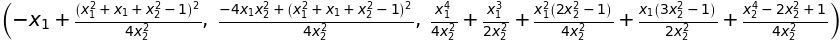

In [ ]:
a = (x1**2 + x1 + x2**2 - 1)**2/(4*x2**2) + x1
b = (x1**2 + x1 + x2**2 - 1)**2/(4*x2**2) - x1
simplify(a),
together(a),
simplify(b),together(b), apart(a, x1)

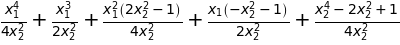

In [ ]:
apart(b, x1)

In [ ]:
F1X1 = diff(F1,x1)
F1X2 = diff(F1,x2)
F2X1 = diff(F2,x1)
F2X2 = diff(F2,x2)

J = sm.Matrix([[F1X1,F1X2],[F2X1,F2X2]])
J

⎡       ⎛         0.5⎞ ⎛        d                    d         ⎞     -0.5     
⎢       ⎝x₂ - │x₁│   ⎠⋅⎜re(x₁)⋅───(re(x₁)) + im(x₁)⋅───(im(x₁))⎟⋅│x₁│    ⋅sign
⎢                      ⎝       dx₁                  dx₁        ⎠              
⎢2⋅x₁ - ──────────────────────────────────────────────────────────────────────
⎢                                           x₁                                
⎢                                                                             
⎢                                    2   3          3                         
⎣                             - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                          

                              ⎤
(x₁)                          ⎥
                       0.5    ⎥
────      2⋅x₂ - 2⋅│x₁│       ⎥
                              ⎥
                              ⎥
             3   2       2   2⎥
      - 21⋅x₁ ⋅x₂  + 3⋅x₁ ⋅x₂ ⎦

In [ ]:
F1X1A = diff(F1x1a,x1)
F1X1B = diff(F1x1b,x1)
F1X2A = diff(F1x1a, x2)
F1X2B = diff(F1x1b, x2)

Ja = sm.Matrix([[F1X1A,F1X2A],[F2X1,F2X2]])
Ja

⎡  3       2      ⎛    2    ⎞       2           4      3     2     2 ⎛    2   
⎢x₁    3⋅x₁    x₁⋅⎝2⋅x₂  - 1⎠   3⋅x₂  - 1     x₁     x₁    x₁    x₁ ⋅⎝2⋅x₂  - 
⎢─── + ───── + ────────────── + ─────────  - ───── - ─── + ─── - ─────────────
⎢  2       2           2              2          3     3    x₂            3   
⎢x₂    2⋅x₂        2⋅x₂           2⋅x₂       2⋅x₂    x₂               2⋅x₂    
⎢                                                                             
⎢               2   3          3                                              
⎣        - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                                               

 ⎞             ⎛    2    ⎞       3            4       2    ⎤
1⎠   3⋅x₁   x₁⋅⎝3⋅x₂  - 1⎠   4⋅x₂  - 4⋅x₂   x₂  - 2⋅x₂  + 1⎥
── + ──── - ────────────── + ──────────── - ───────────────⎥
      x₂           3                2                3     ⎥
                 x₂             4⋅x₂             2⋅x₂      ⎥
                                                           ⎥
 

In [ ]:
Jb = sm.Matrix([[F1X1B,F1X2B],[F2X1,F2X2]])
Jb

⎡  3       2      ⎛    2    ⎞       2           4      3     2     2 ⎛    2   
⎢x₁    3⋅x₁    x₁⋅⎝2⋅x₂  - 1⎠   - x₂  - 1     x₁     x₁    x₁    x₁ ⋅⎝2⋅x₂  - 
⎢─── + ───── + ────────────── + ─────────  - ───── - ─── + ─── - ─────────────
⎢  2       2           2              2          3     3    x₂            3   
⎢x₂    2⋅x₂        2⋅x₂           2⋅x₂       2⋅x₂    x₂               2⋅x₂    
⎢                                                                             
⎢               2   3          3                                              
⎣        - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                                              -

 ⎞           ⎛    2    ⎞       3            4       2    ⎤
1⎠   x₁   x₁⋅⎝- x₂  - 1⎠   4⋅x₂  - 4⋅x₂   x₂  - 2⋅x₂  + 1⎥
── - ── - ────────────── + ──────────── - ───────────────⎥
     x₂          3                2                3     ⎥
               x₂             4⋅x₂             2⋅x₂      ⎥
                                                         ⎥
      3   2  

In [ ]:
def fun(x):
    f = np.zeros(2)
    f[0] = f1(x[0],x[1])
    f[1] = f2(x[0],x[1])
    return f 

def jac(x):
    JJ = J.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

def jacA(x):
    JJ = Ja.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

def jacB(x):
    JJ = Jb.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

def NEWTON(n, fun, jac, x0, pr=0, tol=1.0e-5): 
    x = np.zeros(n)
    b = np.zeros(n)
    A = np.zeros((n,n)) 
    dx = np.zeros(n)
    xStep = np.zeros((1000,n))
    Error=2
    i=0
    x[:]=x0[:]
    xStep[i][:]=x[:]
    while Error>tol and i<999:
        Error0=Error 
#        x0[:]=x[:]
        b=-fun(x)
        A=jac(x)
        print(A)
        dx = np.dot(linalg.pinv(A),b) # ошибка
        x[:]=x[:]+dx[:]
        Error=math.sqrt(np.dot(dx.T,dx))
        k=sm.log(Error)/sm.log(Error0)
        i=i+1
        xStep[i][:]=x[:]
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x, xStep, i

In [ ]:
x10=0
x20=2

X0 = np.array([x10, x20])
#sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr=1, tol=1.0e-10)
solA, xStepA, iStepA = NEWTON(2, fun, jacA, X0, pr=1, tol=1.0e-10)
#solB, xStepB, iStepB = NEWTON(2, fun, jacB, X0, pr=1, tol=1.0e-10)

A = -2
B = 2
N = 1000
f1p = np.zeros((N))
f2p = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    f1p[i] = f1r(x[i])
    f2p[i] = f2r(x[i])

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(solA[0], solA[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

1.37500000000000 0 0.937500000000000 0
[[1.375  0.9375]
 [0.     0.    ]]
итерация:	1 	1.802678e+00 	 
0.287274940271424 -47.2934052219580 0.453745837984261 73.6999838375793
[[  0.28727494   0.45374584]
 [-47.29340522  73.69998384]]
итерация:	2 	2.941540e+00 	  1.83095580396573
-59.5209132540163 143.503142385463 110.880688409973 730.848909463086
[[-59.52091325 110.88068841]
 [143.50314239 730.84890946]]
итерация:	3 	8.015290e-01 	  -0.205048982169989
-33.0048163565550 57.4451219004209 49.2454506603938 271.601838157538
[[-33.00481636  49.24545066]
 [ 57.4451219  271.60183816]]
итерация:	4 	7.920376e-01 	  1.05384455381405
-10.7496529298987 21.8919243090673 8.89526059409724 87.6296001295150
[[-10.74965293   8.89526059]
 [ 21.89192431  87.62960013]]
итерация:	5 	1.133958e+00 	  -0.539207331144927
1.91126274849852 6.02483320471223 1.44475028340929 12.0777662011367
[[ 1.91126275  1.44475028]
 [ 6.0248332  12.0777662 ]]
итерация:	6 	4.526424e+00 	  12.0108261567222
-21.7394007678105 -4170.81

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


<IPython.core.display.Javascript object>

In [ ]:
x10=-10
x20=-1

X0 = np.array([x10, x20])

solB, xStepB, iStepB = NEWTON(2, fun, jacB, X0, pr=1, tol=1.0e-10)

A = -2
B = 2
N = 1000
f1p = np.zeros((N))
f2p = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    f1p[i] = f1r(x[i])
    f2p[i] = f2r(x[i])

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(solB[0], solB[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
[[ -856.  3960.]
 [ 2120. 21300.]]
итерация:	1 	1.250819e+00 	 
-900.177872569010 801.559875508160 4581.40922216266 8953.95516942199
[[-900.17787257 4581.40922216]
 [ 801.55987551 8953.95516942]]
итерация:	2 	1.063588e+00 	  0.275461131073017
-965.029792490363 300.637070483214 5441.61751371878 3769.45049688705
[[-965.02979249 5441.61751372]
 [ 300.63707048 3769.45049689]]
итерация:	3 	9.118638e-01 	  -1.49664117293612
-1053.78072749797 111.369238781211 6628.60096993795 1582.73602350960
[[-1053.7807275   6628.60096994]
 [  111.36923878  1582.73602351]]
итерация:	4 	7.937325e-01 	  2.50376374153665
-1173.21016015701 40.1831234632528 8298.16295633635 654.939015586432
[[-1173.21016016  8298.16295634]
 [   40.18312346   654.93901559]]
итерация:	5 	7.169031e-01 	  1.44070120902889
-1341.76862919670 13.4841691498235 10818.8212335290 257.019510700093
[[-1341.7686292  10818.82123353]
 [   13.48416915   257.0195107 ]]
итерация:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


<IPython.core.display.Javascript object>

In [ ]:
jacB(x)


-2.87650602258128 699.780231044220 -0.935121114587984 717.120002885769


array([[ -2.87650602,  -0.93512111],
       [699.78023104, 717.12000289]])

In [ ]:

SOLB = root(fun, X0, jac = jacB, method='hybr')
#SOLB = root(fun, X0)
print(SOLB)

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(SOL.x[0], SOL.x[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
87.8642949630796 0.0241425781935049 213.055406749909 -0.185705117621948
61.4916240308842 0.0266504334629697 119.407341398034 -0.180693172369241
-1.52640469798188 0.318788737582753 0.297144801439695 -0.307081242519296
4.42046570700838 3.78794168013239 1.80955699730501 -5.91616743599028
2.92442305767688 12.7420086962638 0.594419456580125 -14.7823116906800
1.26300449325518 20.4712460294724 -0.346178751020507 -15.9401596169642
    fjac: array([[-0.27181517, -0.96234948],
       [ 0.96234948, -0.27181517]])
     fun: array([ 3.86574763, -1.09272031])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 62
    njev: 7
     qtf: array([-0.02444307,  4.01754282])
       r: array([-21.44863437,  16.07960429,   0.31195044])
  status: 5
 success: False
       x: array([ 0.91061546, -1.

<IPython.core.display.Javascript object>

# Задание 5

Напишите программу реализующую метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F).

In [ ]:
def f(x):
    return x ** 2

def lf(a, b, epsilon, phi):
    while abs(b - a) >= epsilon:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2:
            a = x1
        else:
            b = x2
    return (a + b) / 2

def hf(a, b, epsilon, phi):
    while abs(b - a) >= epsilon:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        y1 = f(x1)
        y2 = f(x2)
        if y1 <= y2:
            a = x1
        else:
            b = x2
    return (a + b) / 2

In [ ]:
a = float(input('Задайте начало отрезка: '))
b = float(input('Задайте конец отрезка: '))
epsilon = float(input('Задайте точность вычислений: '))

phi = 0.5*(1 + 5 ** 0.5)

print('Минимум равен', f(lf(a, b, epsilon, phi)))
print('Максимум равен', f(hf(a, b, epsilon, phi)))

Задайте начало отрезка: 1
Задайте конец отрезка: 9
Задайте точность вычислений: 1
Минимум равен 1.8514494500883274
Максимум равен 74.63785395013036


# Задание 6

Выполните Упражнение 8.2 (с. 213) из книги Численные методы. Вычислительный практикум (Вабищевич П.Н. - 2010).

In [ ]:
import math as mt
def golden(f, a, b, tol=0.000000000001):

  c1 = (mt.sqrt(5) - 1) / 2
  c2 = 1. - c1
  nit = int(mt.ceil(mt.log(tol / abs(b-a)) / mt.log(c1)))
  
  # First step
  x1 = c1*a + c2*b
  x2 = c2*a + c1*b
  f1 = f(x1)
  f2 = f(x2)
  # Iteration
  for i in range(nit):
    if f1 > f2:
      a = x1
      x1 = x2
      f1 = f2
      x2 = c2*a + c1*b
      f2 = f(x2)
    else:
      b = x2
      x2 = x1
      f2 = f1
      x1 = c1*a + c2*b
      f1 = f(x1)
  if f1 < f2:
    return x1,f1
  else:
    return x2,f2


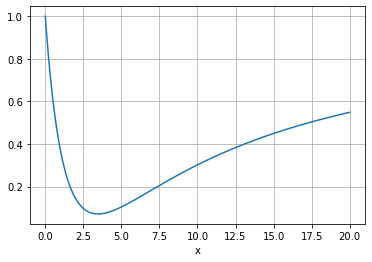

xMin =  3.4641016330255576
fMin =  0.07179676972449077


In [ ]:
import numpy as np
import matplotlib.pyplot as pit
#from golden import golden
def f(x):
  return (x**2 - 6.*x + 12.) / (x**2 + 6.*x + 12.)
a = 0.
b = 20.
x = np.linspace(a, b, 200)
у = f(x)
#y= (x**2 - 6.*x + 12.) / (x**2 + 6.*x + 12.)
pit.plot(x, y)
pit.xlabel('x')
pit.grid(True)
pit.show()
xMin, fMin = golden(f, a, b)
print('xMin = ', xMin)
print('fMin = ', fMin)
xMin - 3.46410163303
fMin = 0.0717967697245


In [ ]:
import numpy as np
#import math as mt

#from golden import golden
def grad(F, GradF, x, d=0.5, tol=1.e-10):

  # Line function along h
  def f(al):
    return F(x + al*h)
  grO = - GradF(x)
  h = grO.copy()
  F0 = F(x)
  itMax = 50000000
  for i in range(itMax):
  # Minimization ID function
    al, fMin = sc.optimize.golden(f, 0, d)
    x = x + al*h
    Fl = F(x)
    grl = - GradF(x)
    if (mt.sqrt(np.dot(grl,grl)) <= tol) or (abs(F0 - Fl) < tol):
      return x, i+1
    h = grl
    grO = gr1.copy()
    F0 = Fl
    print("Gradient method did not converge (500 iterations)")



# Задание 7

Найти все максимумы и минимумы с помощью разработанных программ (методом градиентного спуска) рассматриваемой функции $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$ на отрезки [-1.0;25]. Определить глобальный максимум (наибольший локальный максимум) и минимум на этом отрезке.

In [ ]:
def f(x):
    return (1 + x + x ** 2) * sm.exp(-x) + sm.sin(x + 0.1) - 1


In [ ]:
A = -1
B = 25
N = 1000
fp = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    fp[i] = f(x[i])

plt.figure(figsize = (10,  5))
plt.plot(x, fp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
epsilon = float(input('Задайте точность вычислений: '))

phi = .5 * (1 + 5 ** .5)

mx = []
mn = []

# 1
mx.append(f(hf(-1, 0, epsilon, phi)))
mn.append(f(lf(-1, 0, epsilon, phi)))

# 2
mx.append(f(hf(0, 2, epsilon, phi)))
mn.append(f(lf(4, 5, epsilon, phi)))

#3
mx.append(f(hf(6, 8, epsilon, phi)))

# 4
mn.append(f(lf(10, 12, epsilon, phi)))
mx.append(f(hf(13, 15, epsilon, phi)))

# 5
mn.append(f(lf(16, 18, epsilon, phi)))

# 6
mx.append(f(hf(19, 21, epsilon, phi)))
mn.append(f(lf(22, 24, epsilon, phi)))
mx.append(f(hf(24, 25, epsilon, phi)))

print('Максимумы:', mx)
print('Минимумы:', mn)

print('\nГлобальный максимум:', max(mx))
print('Глобальный минимум:', min(mn))

Задайте точность вычислений: 1
Максимумы: [0.0123709876198652, 1.04742542277872, 0.0235335135700503, -0.00575071372126745, -0.0151778214442112, -1.33514413683039]
Минимумы: [-0.136252851096238, -1.74272581172795, -1.99663433566207, -1.99944893980005, -1.98784277931464]

Глобальный максимум: 1.04742542277872
Глобальный минимум: -1.99944893980005


# Домашнее задание (дополнительное):

# Задание Штрафы. 

Напишите программу для нахождеиия минимума функции одной переменной f(x) на интервале [а, b] при ограничениях g(х) > 0 
методом штрафа с использованием метода золотого сечения для решения задачи безусловной минимизации. 

С ее помощью найдите минимум функции $e^{-x}x$ при $x >= 2$.

In [ ]:
def f(x):
    return  sm.exp(-x)


A = int(input("start interval - a = "))
B = int(input("end interval - b = "))
N = 1000
fp = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    fp[i] = f(x[i])


epsilon = float(input('Задайте точность вычислений: '))

phi = .5 * (1 + 5 ** .5)

mx = []
mn = []

# 1
mx.append(f(hf(-1, 0, epsilon, phi)))
mn.append(f(lf(-1, 0, epsilon, phi)))

# 2
mx.append(f(hf(0, 2, epsilon, phi)))
mn.append(f(lf(4, 5, epsilon, phi)))

#3
mx.append(f(hf(6, 8, epsilon, phi)))

# 4
mn.append(f(lf(10, 12, epsilon, phi)))
mx.append(f(hf(13, 15, epsilon, phi)))

# 5
mn.append(f(lf(16, 18, epsilon, phi)))

# 6
mx.append(f(hf(19, 21, epsilon, phi)))
mn.append(f(lf(22, 24, epsilon, phi)))
mx.append(f(hf(24, 25, epsilon, phi)))

#print('Максимумы:', mx)
print('Минимумы:', mn)

#print('\nГлобальный максимум:', max(mx))
print('Глобальный минимум:', min(mn))

# Задание. Определитель.

Напишите программу для вычисления определителя матрицы произвольной размерности методом разложения по строке или столбцу (https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C).

In [ ]:
def getMinor(matrix, i1, j1):
    minor = np.zeros((len(matrix) - 1, len(matrix) - 1))
    i2 = 0
    for i in range(len(matrix)):
        j2 = 0
        if i == i1:
            continue
        for j in range(len(matrix)):
            if j == j1:
                continue
            minor[i2][j2] = matrix[i][j]
            j2 += 1
        i2 += 1
    return minor

In [ ]:
matrix = np.array([[1, 2, 3],
                   [3, 4, 5],
                   [5, 6, 7]])
getMinor(matrix, 0, 0)

In [ ]:
def determinant_R(matrix):
    if len(matrix) == 1:
        return matrix[0][0]
    s = 0
    for i in range(len(matrix)):
        s += (-1) ** i * matrix[0][i] * determinant_R(getMinor(matrix, 0, i))
    return s

In [ ]:
K = np.eye(3)
A = np.array([[1, 2, 3],
              [3, 4, 5],
              [5, 6, 7]])
print(determinant_R(K))
print(determinant_R(A))

# Задание. Области притяжения.

Как мы уже поняли у каждого корня есть своя область притяжения (окрестность выбирая начальное приближение из которой можно получить этот корень с помощью итерационного метода, например метода Ньютона). Постройте для системы уравнений из задания 4 область притяжения каждого корня.


In [ ]:
import math
import numpy as np

x, x1, x2 = symbols('x, x1, x2')

F1 = x1**2 + (x2 - abs(x1)**0.5)**2 - 1
F2 = x1**2*x2**3  -  7*x1**3*x2**3  -  7

 
class Function():
    def f(self, x):
        return sm.log(abs(x+1)) - 2*math.pow(x, 2) + 1
 
class NewtonMethod():
    def derrirative(self, x):
        return 1/(x+1) - 4*x
 
    def newtonsMethod(self, f, a, b,derrirative):
        try:
            x0 = (a+b)/2
            xn = x0
            xn1 = xn - f(xn) / derrirative(xn)
            while abs(xn1-xn) > math.pow(10,-3):
                xn = xn1
                xn1 = xn - f(xn) / derrirative(xn)
            return xn1
        except:
            print("Error!")
 
func = Function()

nm = NewtonMethod()


x1 = nm.newtonsMethod(func.f, -0.6, -0.4, nm.derrirative)
y1 = nm.newtonsMethod(func.f, 0.8, 1., nm.derrirative)
print("NM The first solution on such interval [-0.6; -0.4] x1 is: " + str(x1))
print("NM The second solution on such interval [0.8; 1] x2 is: " + str(y1))
print("F(x1) is: " + str(func.f(x1)))
print("F(x2) is: " + str(func.f(y1)))


In [ ]:
def sqrt(x):
    
    def sqrtIter(guess):
        if goodEnaugh(guess):
            return guess
        else:
            return sqrtIter(improve(guess))
        
    def improve(guess):
        return average(guess, x/guess)
    
    def average(x, y):
        return (x+y)/2
    
    def goodEnaugh(guess):
        if(abs(guess**2-x)<0.001):
            return 1
        else:
            return 0
        
    return sqrtIter(1.0)


sqrt(int(input()))